In [1]:
import keras 
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from keras.optimizers import RMSprop, Adam
import os 

Using TensorFlow backend.


# 首先我們使用一般的 DNN (MLP) 來訓練


由於 DNN 只能輸入一維的資料，我們要先將影像進行攤平，若 (50000, 32, 32, 3) 的影像，攤平後會變成 (50000, 32 X32X3) = (50000, 3072)

In [3]:
num_classes=10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [4]:
data_generator = ImageDataGenerator(rotation_range=20, width_shift_range=0.2, 
                                    height_shift_range=0.2, horizontal_flip=True)

In [8]:
model = Sequential()
model.add(Conv2D(32,(3,3), padding='same', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.summary()

model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

history = model.fit_generator(data_generator.flow(x_train, y_train), steps_per_epoch=int(len(x_train)//32), 
                    epochs=10, verbose=1)
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_19 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_20 (Activation)   (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 15, 15, 64)        18496     
__________

W1202 14:54:20.336192 10032 deprecation.py:323] From C:\Users\User\Anaconda3\envs\DL\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/10
1562/1562 [==============================] - 233s 149ms/step - loss: 1.7293 - acc: 0.3594
Epoch 2/10
1562/1562 [==============================] - 226s 145ms/step - loss: 1.4375 - acc: 0.4766
Epoch 3/10
1562/1562 [==============================] - 201s 129ms/step - loss: 1.3066 - acc: 0.5288
Epoch 4/10
1562/1562 [==============================] - 201s 129ms/step - loss: 1.2387 - acc: 0.5573
Epoch 5/10
1562/1562 [==============================] - 201s 129ms/step - loss: 1.1833 - acc: 0.5776
Epoch 6/10
1562/1562 [==============================] - 11035s 7s/step - loss: 1.1553 - acc: 0.5912
Epoch 7/10
1562/1562 [==============================] - 95s 61ms/step - loss: 1.1115 - acc: 0.6061
Epoch 8/10
1562/1562 [==============================] - 96s 62ms/step - loss: 1.0908 - acc: 0.6152
Epoch 9/10
1562/1562 [==============================] - 95s 61ms/step - loss: 1.0771 - acc: 0.6223 0s - loss: 1.0771
Epoch 10/10
1562/1562 [==============================] - 100s 64ms/step - loss: 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_37 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_38 (Activation)   (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_19 (Dropout)         (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 15, 15, 64)        18496     
__________

1563/1562 [==============================] - 94s 60ms/step - loss: 1.4887 - acc: 0.4702 - val_loss: 1.1162 - val_acc: 0.6016
exp-60-0.2-0.2-True
Epoch 1/5
1563/1562 [==============================] - 98s 62ms/step - loss: 1.3298 - acc: 0.5301 - val_loss: 1.1107 - val_acc: 0.6119
Epoch 2/5
1563/1562 [==============================] - 97s 62ms/step - loss: 1.2695 - acc: 0.5536 - val_loss: 1.0778 - val_acc: 0.6287
Epoch 3/5
1563/1562 [==============================] - 97s 62ms/step - loss: 1.2568 - acc: 0.5585 - val_loss: 1.1625 - val_acc: 0.6031
Epoch 4/5
1563/1562 [==============================] - 97s 62ms/step - loss: 1.2318 - acc: 0.5654 - val_loss: 1.1530 - val_acc: 0.6136
Epoch 5/5
1563/1562 [==============================] - 103s 66ms/step - loss: 1.2261 - acc: 0.5700 - val_loss: 1.1230 - val_acc: 0.6194
exp-60-0.2-0.2-False
Epoch 1/5
1563/1562 [==============================] - 99s 63ms/step - loss: 1.2163 - acc: 0.5746 - val_loss: 1.1212 - val_acc: 0.6174
Epoch 2/5
1563/1562 [==

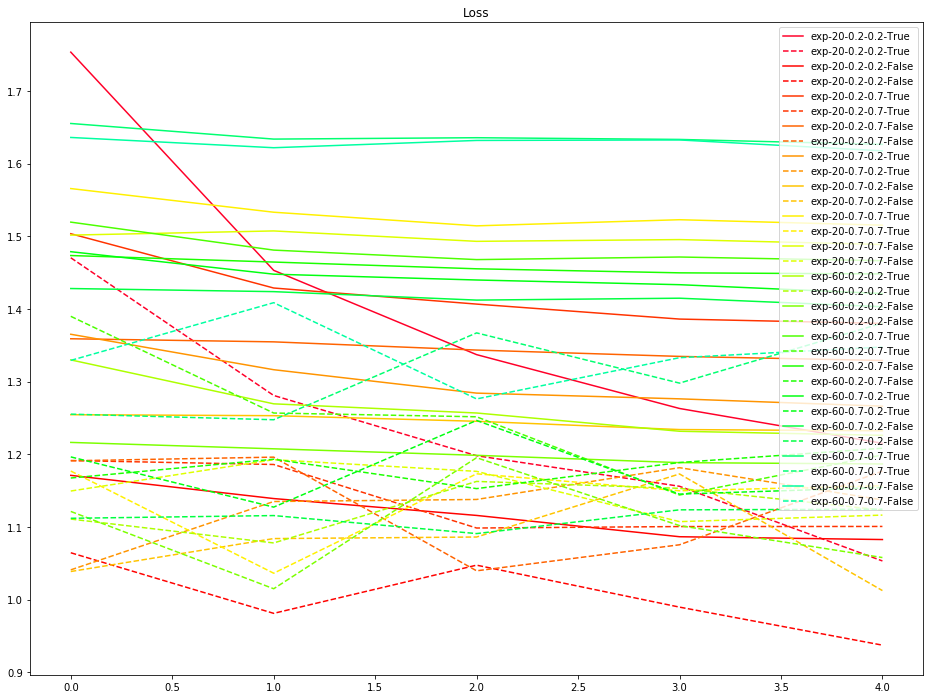

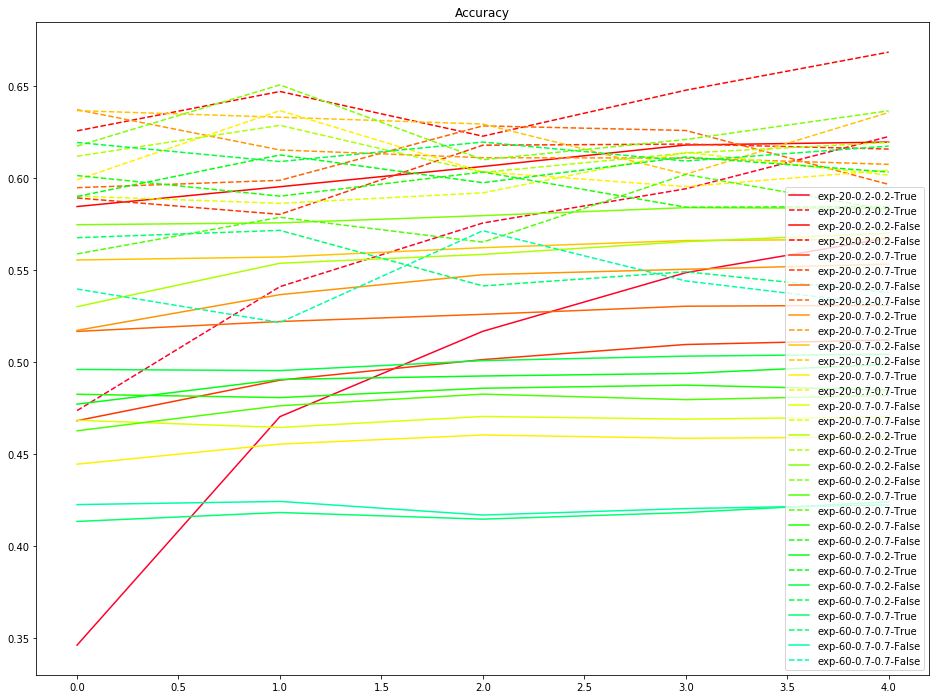

In [11]:
import itertools
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))
model.summary()

RR=[20,60]
WS=[0.2,0.7]
HS=[0.2,0.7]
HF=[True,False]

results = {}
for i, (rr,ws,hs,hf) in enumerate(itertools.product(RR,WS,HS,HF)):
    print(f"exp-{rr}-{ws}-{hs}-{hf}")
    data_generator = ImageDataGenerator(
        rotation_range=rr,
        width_shift_range=ws,
        height_shift_range=hs,
        horizontal_flip=hf)

    data_generator.fit(x_train)

    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])


    history = model.fit_generator(data_generator.flow(x_train,y_train, batch_size=32, shuffle=False), 
                                  steps_per_epoch=x_train.shape[0]/32, 
                                  epochs=5, 
                                  verbose=1, 
                                  validation_data=(x_test,y_test) 
                                  )
    exp_name_tag = (f"exp-{rr}-{ws}-{hs}-{hf}")
    results[exp_name_tag] = {'train-loss': model.history.history["loss"],
                             'valid-loss': model.history.history["val_loss"],
                             'train-acc': model.history.history["acc"],
                             'valid-acc': model.history.history["val_acc"]}
        
    
import matplotlib.pyplot as plt
import matplotlib.cm as mplcm
import matplotlib.colors as colors
%matplotlib inline
NUM_COLORS = 30

cm = plt.get_cmap('gist_rainbow')
cNorm  = colors.Normalize(vmin=0, vmax=NUM_COLORS-1)
scalarMap = mplcm.ScalarMappable(norm=cNorm, cmap=cm)
color_bar = [scalarMap.to_rgba(i) for i in range(NUM_COLORS)]

plt.figure(figsize=(16,12))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(16,12))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()